**Exercise 2.1**

Given the following 4 data points

$$
\lbrace (0,1), (1,2), (3,6), (5,7) \rbrace
$$

find a polynomial in Lagrange form to interpolate these data

Answer:

*Python function design:*

* Input: a numpy array of 2 cols, or a list with 2 cols; The first col is $x$ and the second is $f(x)$
* Output: coefficient of x in different ranks, and the format should apply fraction number
* Function: realize Lagrange interpolation

we know that the formula for Lagrange interpolaiton is:

$$
L_{n,k}(x) = \prod_{i = 0, i \neq k}^n \frac{x-x_i}{x_k-x_i}
$$

* first step is to hold data points in a numpy array
* then calculate the `num` and `den` for each fraction
* `den` is quite simple, use multiplication of each $x_k-x_i$, except $i=k$ 
* `num` seems a little complicated, `FFT` can be used for polynomial multiplication 

https://www.geeksforgeeks.org/fast-fourier-transformation-poynomial-multiplication/

https://www.codingninjas.com/codestudio/library/fast-fourier-transform-for-polynomial-multiplication

In [56]:
import numpy as np
from fractions import Fraction

# create x-f(x) lists (numpy array)
# actually, data could be export from a csv or excel file
# by using pandas or xlread
data = np.array([[0, 1], [1, 2], [3, 6], [5, 7]])

# get shape of the data array
rows = data.shape[0]
cols = data.shape[1]
print("shape of data (%d, %d)" %(rows, cols))


def testGetDen(data, len, index):
    final = 1
    for i in range (len):
        if index != i:
            final = final * (data[index, 0] - data[i, 0])

    return final
    

def testGetNum(data, length, index):
    prod = [1]

    # start from the highest rank, which is len - 1
    for i in range (length):
        if i != index:
            m = len(prod)
            n = 2
            B = [-data[i, 0], 1]
            prod = multiply(prod, B, m, n)

    return prod

def multiply(A, B, m, n):
  
    prod = [0] * (m + n - 1)
      
    # Multiply two polynomials term by term
      
    # Take ever term of first polynomial
    for i in range(m):
          
        # Multiply the current term of first 
        # polynomial with every term of 
        # second polynomial.
        for j in range(n):
            prod[i + j] += A[i] * B[j]
  
    return prod


def printPoly(poly, n):
  
    for i in range(n):
        print(poly[i], end = "");
        if (i != 0):
            print("x^%d" %(i), end = "");
        if (i != n - 1):
            print(" + ", end = "");

def testAll(data):
    length = data.shape[0]
    coef_list = []
    # get coefs
    for i in range (length):
        coef = Fraction(1/testGetDen(data, length, i)).limit_denominator() \
         * Fraction(data[i, 1]).limit_denominator()
        coef_list.append(coef)

    print("coefs: ", coef_list)

    final = [Fraction(0,1)] * length

    # get nums
    print("each polynomial without coefs: ")
    for i in range (length):
        # on index
        num = testGetNum(data, length, i)
        printPoly(num, length)
        print(" ")
        for j in range (length):
            #print(Fraction(num[j]).limit_denominator() * coef_list[i])
            final[j] += Fraction(num[j]).limit_denominator() * coef_list[i]
         
    return final
        

final = testAll(data)
print("final polynomial: ")
printPoly(final, rows)





shape of data (4, 2)
coefs:  [Fraction(-1, 15), Fraction(1, 4), Fraction(-1, 2), Fraction(7, 40)]
each polynomial without coefs: 
-15 + 23x^1 + -9x^2 + 1x^3 
0 + 15x^1 + -8x^2 + 1x^3 
0 + 5x^1 + -6x^2 + 1x^3 
0 + 3x^1 + -4x^2 + 1x^3 
final polynomial: 
1 + 29/120x^1 + 9/10x^2 + -17/120x^3

In [ ]:
# collect to a solver class
class LagrangeSolver:
    # init function
    def __init__(self, data_array):
        # define rows and cols
        self.rows = data_array.shape[0]
        self.clos = data_array.shape[1]

        # store data
        self.data = data_array

    #def getDen(self):

**Exercise 2.5**

Consider a function $f(x)=\sin(\pi x)+3x$ at 6 distinct nodes in the interval $[-1, 1]$ to determine the Newton's divided difference formula. The data are given in Table below:

| $x$    | -1.0 | -0.6    | -0.2    | 0.2    | 0.6    | 1.0  |
| ------ | ---- | ------- | ------- | ------ | ------ | ---- |
| $f(x)$ | -3.0 | -2.7511 | -1.1878 | 1.1878 | 2.7511 | 3.0  |

Newton's divided difference formula:

the design method is like Exercise 2.1, namely using a class;

the input should be a numpy array, and the output should be a polynomial and a series of processing formulas;

if there are n points(in pair), then $p=n-1$, get each coefs to get the formula;

$$

$$

[-3.          0.62225     4.1075     -1.30755208 -1.82698568  1.82698568]
[[-3.          0.          0.          0.          0.          0.        ]
 [-2.7511      0.62225     0.          0.          0.          0.        ]
 [-1.1878      3.90825     4.1075      0.          0.          0.        ]
 [ 1.1878      5.939       2.5384375  -1.30755208  0.          0.        ]
 [ 2.7511      3.90825    -2.5384375  -4.23072917 -1.82698568  0.        ]
 [ 3.          0.62225    -4.1075     -1.30755208  1.82698568  1.82698568]]


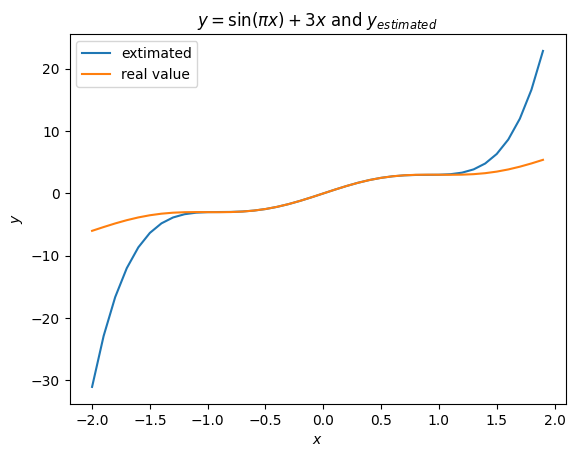

In [40]:
from cProfile import label
from math import sin
import numpy as np
import matplotlib.pyplot as plt
points = np.array([[-1.0, -3.0], [-0.6, -2.7511], [-0.2, -1.1878], \
    [0.2, 1.1878], [0.6, 2.7511], [1.0, 3.0]])

def fun(x):
    PI = 3.1415926
    return np.sin(PI*x) + 3*x

def multiply(A, B, m, n):
  
    prod = [0] * (m + n - 1)
      
    # Multiply two polynomials term by term
      
    # Take ever term of first polynomial
    for i in range(m):
          
        # Multiply the current term of first 
        # polynomial with every term of 
        # second polynomial.
        for j in range(n):
            prod[i + j] += A[i] * B[j]
  
    return prod
    

def newton_divided_difference_interpolation(points, x):
    n = len(points)
    F = points[:, 1]
    y = []

    n_sequence = len(x)

    # create a table to store coefs table
    calculation_table = np.zeros((n, n))

    # init the first column with f(x) values
    for i in range(n):
        calculation_table[i, 0] = points[i, 1]

    for i in range(n):
        for j in range(n-1, i, -1):
            F[j] = (F[j]- F[j-1]) / \
                (points[j, 0] - points[j-1-i, 0])
            calculation_table[j, i+1] = F[j]

    print(F)
    print(calculation_table)

    
    for k in range(n_sequence):
        y_estimated = points[0, 1]

        for i in range(1, n):
            a = F[i]
            for j in range(i):
                a = (x[k] - points[j, 0]) * a
            
            y_estimated += a
        
        y.append(y_estimated)

    y_real = fun(x)
    
    fig, ax = plt.subplots()

    ax.plot(x, y, label="estimated")
    ax.plot(x, y_real, label="real value")

    #plt.plot(x, y, x, y_real)

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title("$y=\sin(\pi x)+3x$ and $y_{estimated}$")
    ax.legend()
    plt.show()


            
x = np.arange(-2, 2, 0.1)
y = fun(x)



newton_divided_difference_interpolation(points, x)



within $(-1, 1)$, the formula keeps a good precision; but errors occur when the range is exceeded, which might cause a great error.

**Exercise 2.6**

Construct an approximating polynomial for the following data using Hermite interpolation with Newton's forward difference

Table 1:

| $x$     | 0.1         | 0.2         | 0.3         | 
| ------- | ----------- | ----------- | ----------- | 
| $f(x)$  | -0.29004996 | -0.56079734 | -0.81401972 | 
| $f'(x)$ | -2.8019975  | -2.6159201  | -2.9734038  | 

Table 2:

| $x$     | -1.0       | -0.5       | 0.0        | 0.5        |
| ------- | ---------- | ---------- | ---------- | ---------- |
| $f(x)$  | 0.86199480 | 0.95802009 | 1.0986123  | 1.2943767  |
| $f'(x)$ | 0.15536240 | 0.23269654 | 0.33333333 | 0.45186776 |

In [3]:
import numpy as np

def hermite(points):
    n = points.shape[0]
    rewrite_times = points.shape[1] - 1

    z_points = points[:, 0].repeat(rewrite_times)
    n_z = len(z_points)

    F = points[:, 1].repeat(rewrite_times)
    F1 = points[:, 2].repeat(rewrite_times)


    # create a table to store coefs table
    calculation_table = np.zeros((n_z, n_z))

    # init the first column with f(x) values
    for i in range(n_z):
        calculation_table[i, 0] = F[i]

    for i in range(n_z):
        for j in range(n_z-1, i, -1):

            if j%rewrite_times != 0 and i == 0:
                F[j] = F1[j]
            else:
                F[j] = (F[j]- F[j-1]) / \
                    (z_points[j] - z_points[j-1-i])

            calculation_table[j, i+1] = F[j]

    np.set_printoptions(suppress = True)
    #np.set_printoptions(precision=10)
    print(calculation_table)
    print(F)


points = np.array([[0.1, -0.29004996, -2.8019975], \
    [0.2, -0.56079734, -2.6159201], \
    [0.3, -0.81401972, -2.9734038]])

points1 = np.array([[-1.0, 0.86199480, 0.15536240], \
    [-0.5, 0.95802009, 0.23269654], \
    [0.0, 1.0986123, 0.33333333],
    [0.5, 1.2943767, 0.45186776]])

hermite(points)

hermite(points1)



[[   -0.29004996     0.             0.             0.
      0.             0.        ]
 [   -0.29004996    -2.8019975      0.             0.
      0.             0.        ]
 [   -0.56079734    -2.7074738      0.945237       0.
      0.             0.        ]
 [   -0.56079734    -2.6159201      0.915537      -0.297
      0.             0.        ]
 [   -0.81401972    -2.5322238      0.836963      -0.39287
     -0.47935        0.        ]
 [   -0.81401972    -2.9734038     -4.4118       -52.48763
   -260.4738     -1299.97225   ]]
[   -0.29004996    -2.8019975      0.945237      -0.297
    -0.47935    -1299.97225   ]
[[ 0.8619948   0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.8619948   0.1553624   0.          0.          0.          0.
   0.          0.        ]
 [ 0.95802009  0.19205058  0.07337636  0.          0.          0.
   0.          0.        ]
 [ 0.95802009  0.23269654  0.08129192  0.01583112  0.          0.
   0.          0.        ]
 [ 1

**Exercise 2.7**

Choose equally-spaced 15 points in $[-5,5]$ and get the data points 

$$
\lbrace x_i,f(x_i) \rbrace_{i=0}^{14}
$$

by $f(x)=1/(1+x^2)$. Using piecewise linear interpolation to get the approximation of $f(x)$ in $[-5,5]$ and, compare the result with that obtained by Lagrange interpolation.

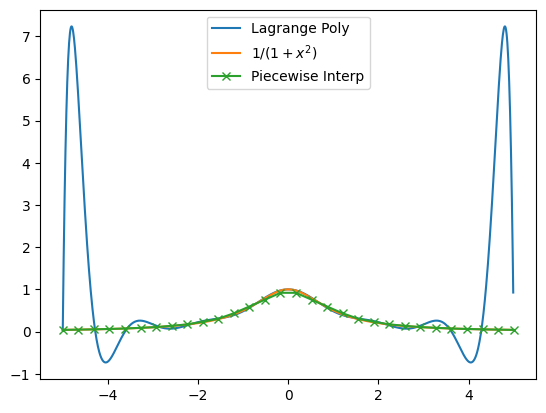

In [21]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, num = 15)
x_new = np.arange(-5, 5, 0.01)
xval = np.linspace(-5, 5, num = 30)
n = len(x)
y = 1/(1+x*x)

poly = lagrange(x, y)
y_interp = np.interp(xval, x, y)


#plt.scatter(x, y, label='data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Lagrange Poly')
plt.plot(x_new, 1/(1+x_new*x_new), label = "$1/(1+x^2)$")
plt.plot(xval, y_interp, '-x', label="Piecewise Interp")
plt.legend()
plt.show()


